In [1]:
import pandas as pd

In [2]:
housing=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
housing.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


There is null value in any attributes.If there is null value  take place then we can add median in place of null.

In [5]:
housing['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>]],
      dtype=object)

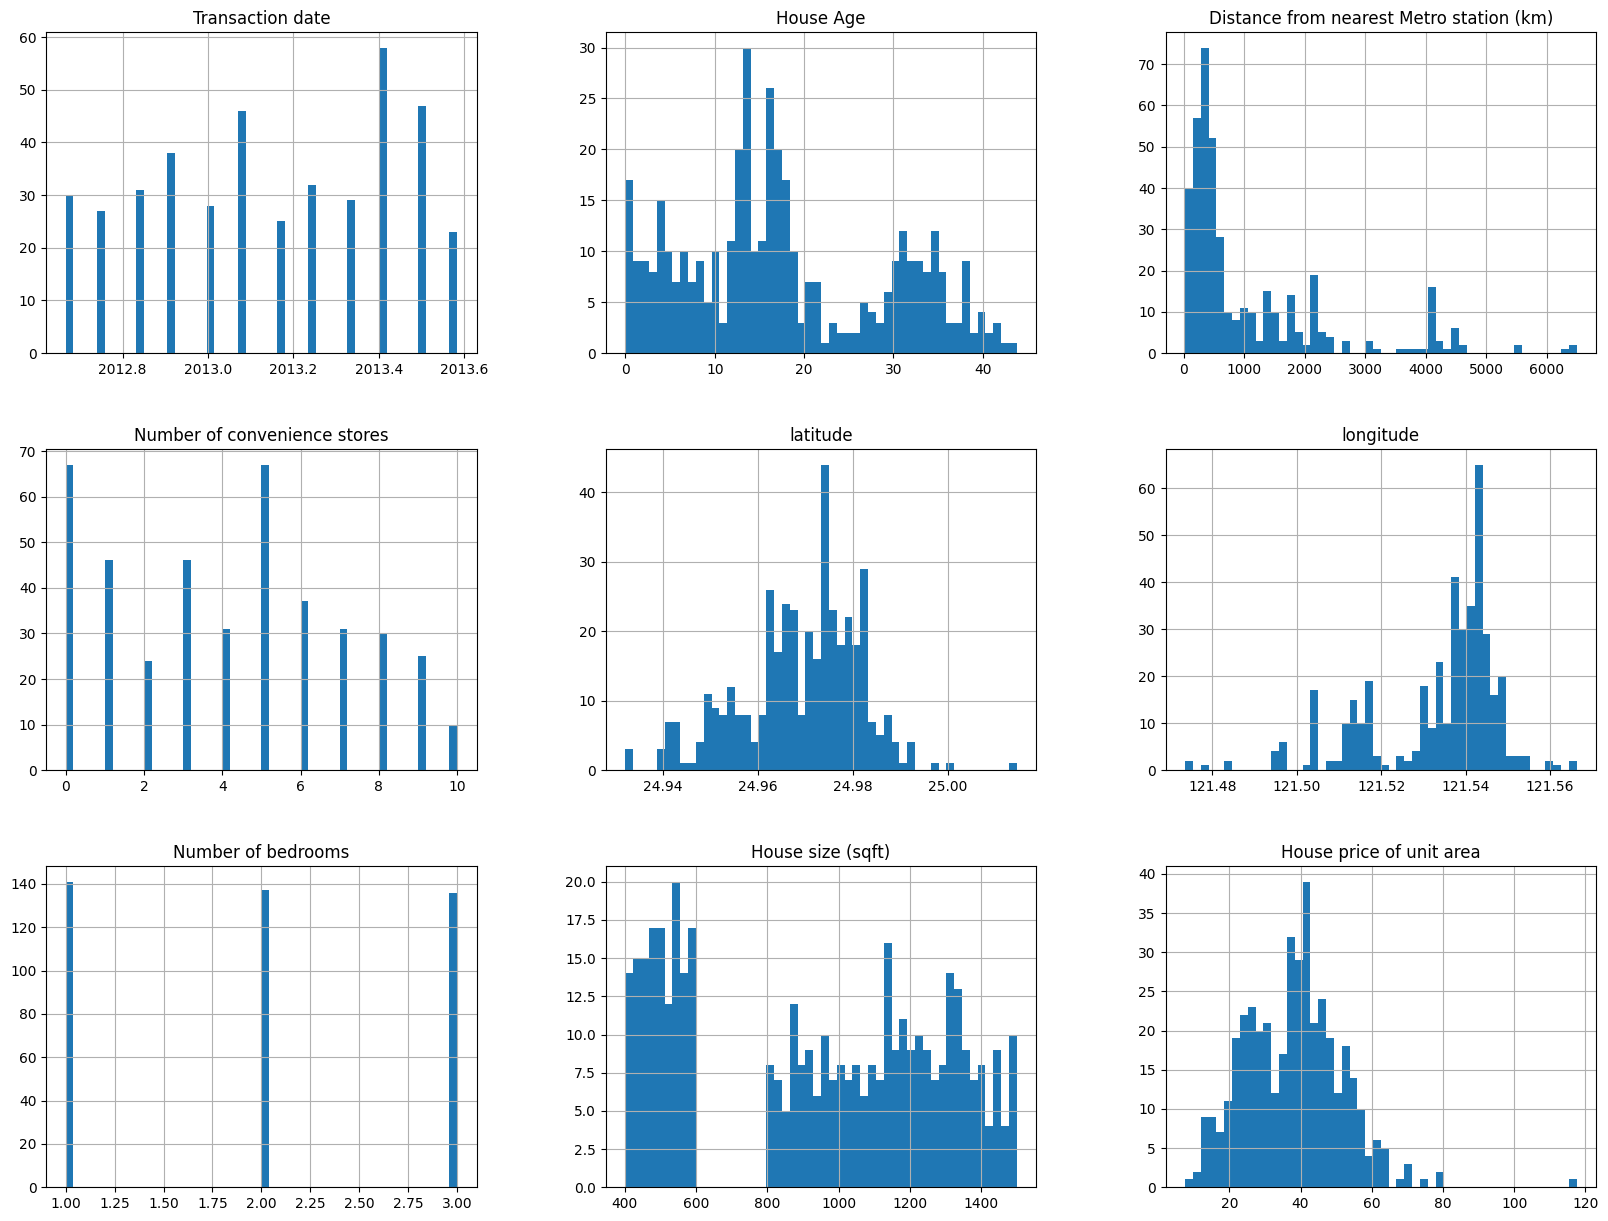

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.1,random_state=42)
print(f"Rows in train_set: {len(train_set)},\n Rows in test_set: {len(test_set)}")

Rows in train_set: 372,
 Rows in test_set: 42


By observing data there is no need to do shuffling of any attributes

#  lets look at the correlations

In [10]:
corr_matrix=housing.corr()

In [11]:
corr_matrix['House price of unit area'].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

above the correlation showing that , number convenience stores have more effect on price and distance drom nearest metro station has least effect .

In [12]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='House price of unit area', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='latitude', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>],
       [<AxesSubplot:xlabel='House price of unit area', ylabel='Number of convenience stores'>,
        <AxesSubplot:xlabel='Number of convenience stores', ylabel='Number of convenience stores'>,
        <AxesSubplot:xlabel='latitude', ylabel='Number of convenience stores'>,
        <AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='Number of convenience stores'>],
       [<AxesSubplot:xlabel='House price of unit area', ylabel='latitude'>,
        <AxesSubplot:xlabel='Number of convenience stores', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:x

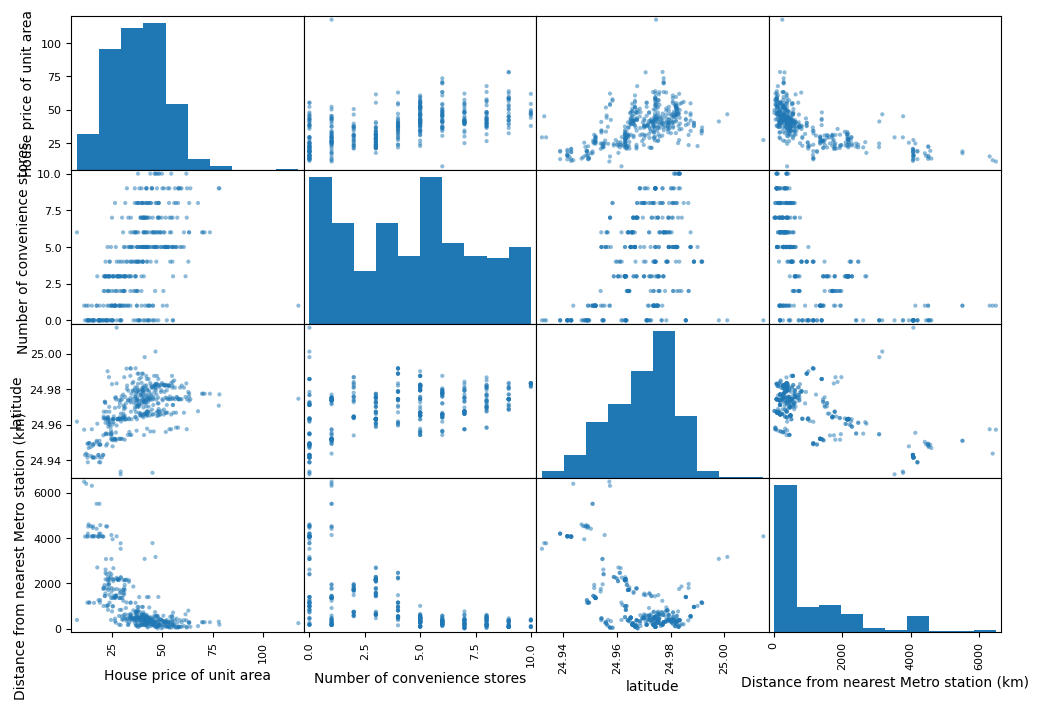

In [13]:
attributes=["House price of unit area","Number of convenience stores","latitude","Distance from nearest Metro station (km)"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [14]:
housing=train_set.drop("House price of unit area",axis=1)
housing_labels=train_set["House price of unit area"].copy()

# Now selecting a desired model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing,housing_labels)

RandomForestRegressor()

In [16]:
some_data=housing.iloc[:5]

In [17]:
some_labels=housing_labels.iloc[:5]

In [18]:
model.predict(some_data)

array([40.212, 37.488, 40.247, 56.253, 29.458])

In [19]:
some_labels

0      37.9
317    37.5
272    40.5
124    57.4
271    26.5
Name: House price of unit area, dtype: float64

### Evaluating the model

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [21]:
mse

8.901187723118273

In [22]:
rmse

2.983485834241261

## using better evaluation technique-cross validation

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [24]:
rmse_scores

array([ 5.71455944,  7.75147559,  5.50171895,  7.51672463,  8.64508968,
        4.56382131,  7.71152299,  6.31067915,  6.69872879, 13.37833261])

In [25]:
def print_score(scores):
    print("score: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation",scores.std())

In [26]:
print_score(rmse_scores)

score:  [ 5.71455944  7.75147559  5.50171895  7.51672463  8.64508968  4.56382131
  7.71152299  6.31067915  6.69872879 13.37833261]
Mean:  7.379265314006014
Standard deviation 2.3170478584817618


# Testing the model on test data

In [27]:
x_test=test_set.drop("House price of unit area",axis=1)
Y_test=test_set["House price of unit area"].copy()
final_predictions=model.predict(x_test)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [28]:
final_mse

41.0228360714285

In [29]:
final_rmse

6.404907186792678